In [39]:
import pandas as pd
import numpy as np
import io
#from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
from google.colab import files

uploaded=files.upload()

Saving Iris.csv to Iris (3).csv


In [40]:
iris=pd.read_csv(io.StringIO(uploaded['Iris.csv'].decode('utf-8')))
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

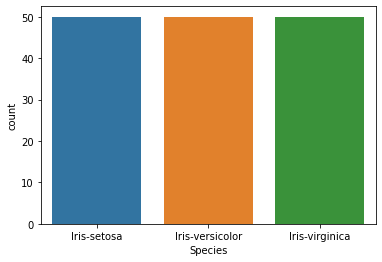

In [42]:
sns.countplot(x='Species',data=iris)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'marker'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


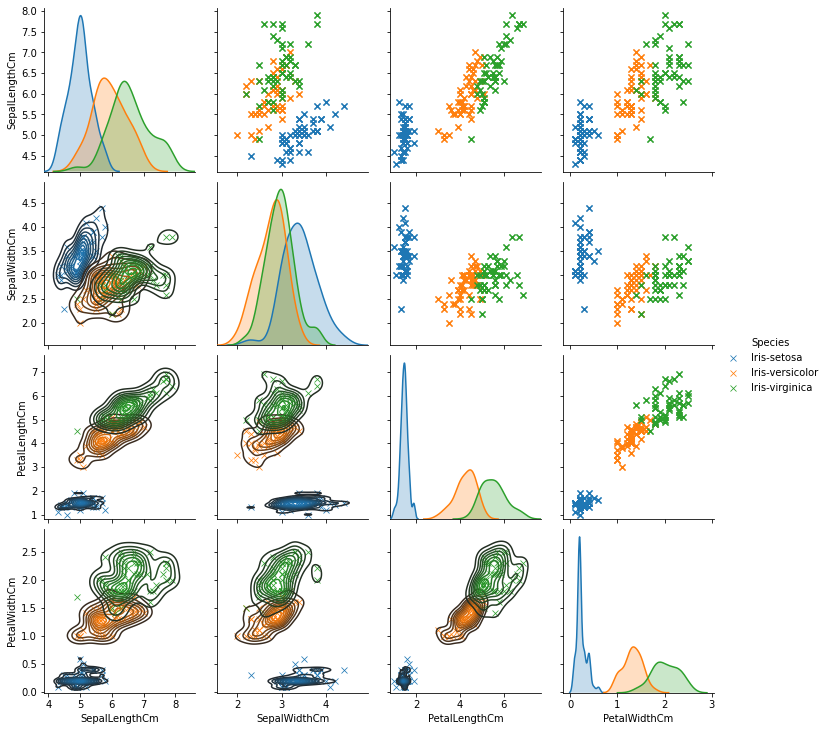

In [43]:
snsdata = iris.drop(['Id'], axis=1)
g = sns.pairplot(snsdata, hue='Species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

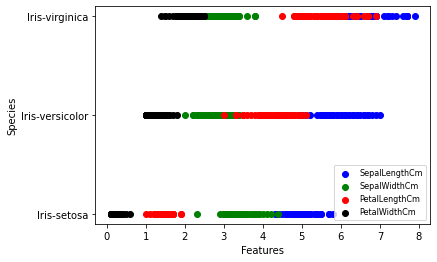

In [44]:
plt.xlabel('Features')
plt.ylabel('Species')

pltX = iris.loc[:,'SepalLengthCm']
pltY = iris.loc[:,'Species']
plt.scatter(pltX, pltY, color='blue', label='SepalLengthCm')

pltX = iris.loc[:,'SepalWidthCm']
pltY = iris.loc[:,'Species']
plt.scatter(pltX, pltY, color='green', label='SepalWidthCm')

pltX = iris.loc[:, 'PetalLengthCm']
pltY = iris.loc[:,'Species']
plt.scatter(pltX, pltY, color='red', label='PetalLengthCm')

pltX = iris.loc[:, 'PetalWidthCm']
pltY = iris.loc[:,'Species']
plt.scatter(pltX, pltY, color='black', label='PetalWidthCm')

plt.legend(loc=4, prop={'size':8})
plt.show()

In [0]:
#Split the data into 80% training and 20% testing
iris.drop('Id',axis=1,inplace=True)
#Prepare the training set

# X = feature values, all the columns except the last column
X = iris.iloc[:, :-1]

# y = target values, last column of the data frame
y = iris.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

print( accuracy_score(y_test, predictions))

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

1.0
